<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import math
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

sns.set_context("poster")
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")

%matplotlib inline

/Users/Vagner/opt/anaconda3/envs/test/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = "../../DATA/Sacramento_transactions.csv"

In [3]:
data = pd.read_csv(house_csv)

In [4]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [7]:
data.shape

(985, 12)

In [8]:
data.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [9]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
street,985,981,8306 CURLEW CT,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,985,39,SACRAMENTO,439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip,985.0,NaN,NaN,NaN,95750.697462,85.176072,95603.0,95660.0,95762.0,95828.0,95864.0
state,985,1,CA,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beds,985.0,NaN,NaN,NaN,2.911675,1.307932,0.0,2.0,3.0,4.0,8.0
baths,985.0,NaN,NaN,NaN,1.77665,0.895371,0.0,1.0,2.0,2.0,5.0
sq__ft,985.0,NaN,NaN,NaN,1314.916751,853.048243,0.0,952.0,1304.0,1718.0,5822.0
type,985,4,Residential,917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sale_date,985,5,Mon May 19 00:00:00 EDT 2008,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,985.0,NaN,NaN,NaN,234144.263959,138365.839085,1551.0,145000.0,213750.0,300000.0,884790.0


In [ ]:
# 1. Investigate 0 beds observations
# 2. Investigate 0 baths observations
# 3. Investigate 0 sq__ft observations
# 4. Investigate outliers for price

In [10]:
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [11]:
#zip is categorical value, should be string
data['zip'] = data['zip'].astype(str)

In [12]:
data.dtypes

street        object
city          object
zip           object
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [13]:
data.type.unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fabc280e880>,
 'caps': [<matplotlib.lines.Line2D at 0x7fabc280edc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fabc280e5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fabd09e4340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fabd09e45e0>],
 'means': []}

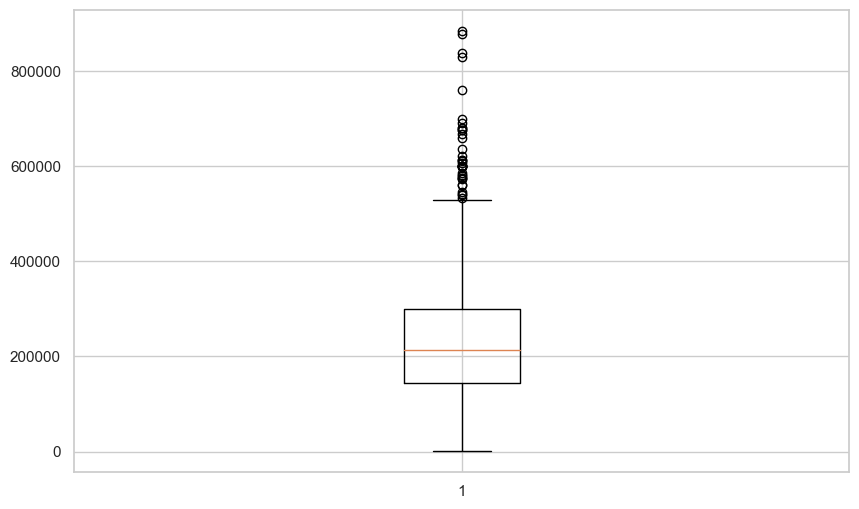

In [14]:
plt.boxplot(data.price)

1. Documentation of this data set

We have 0 values for beds, baths, sq__ft. These are missing null which was represented by 0

In [15]:
data[data['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


<AxesSubplot: >

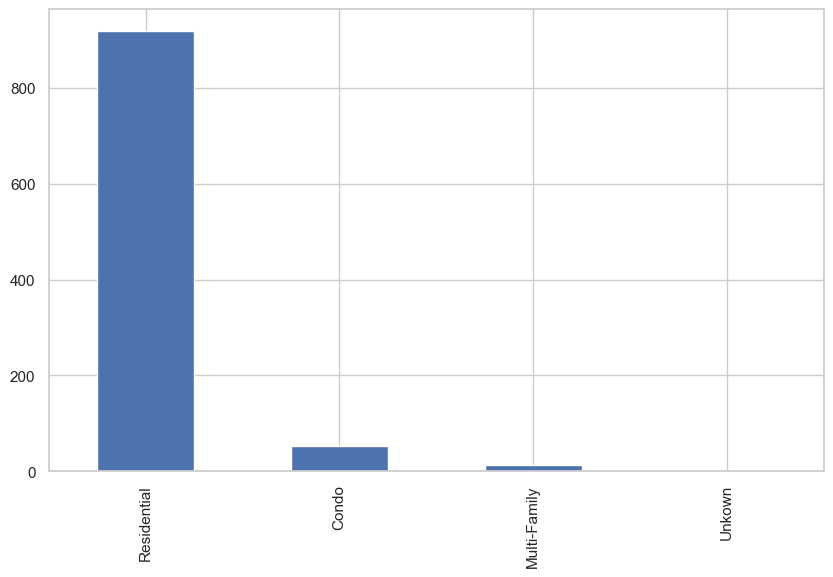

In [16]:
# Types of data
data['type'].value_counts().plot(kind='bar')

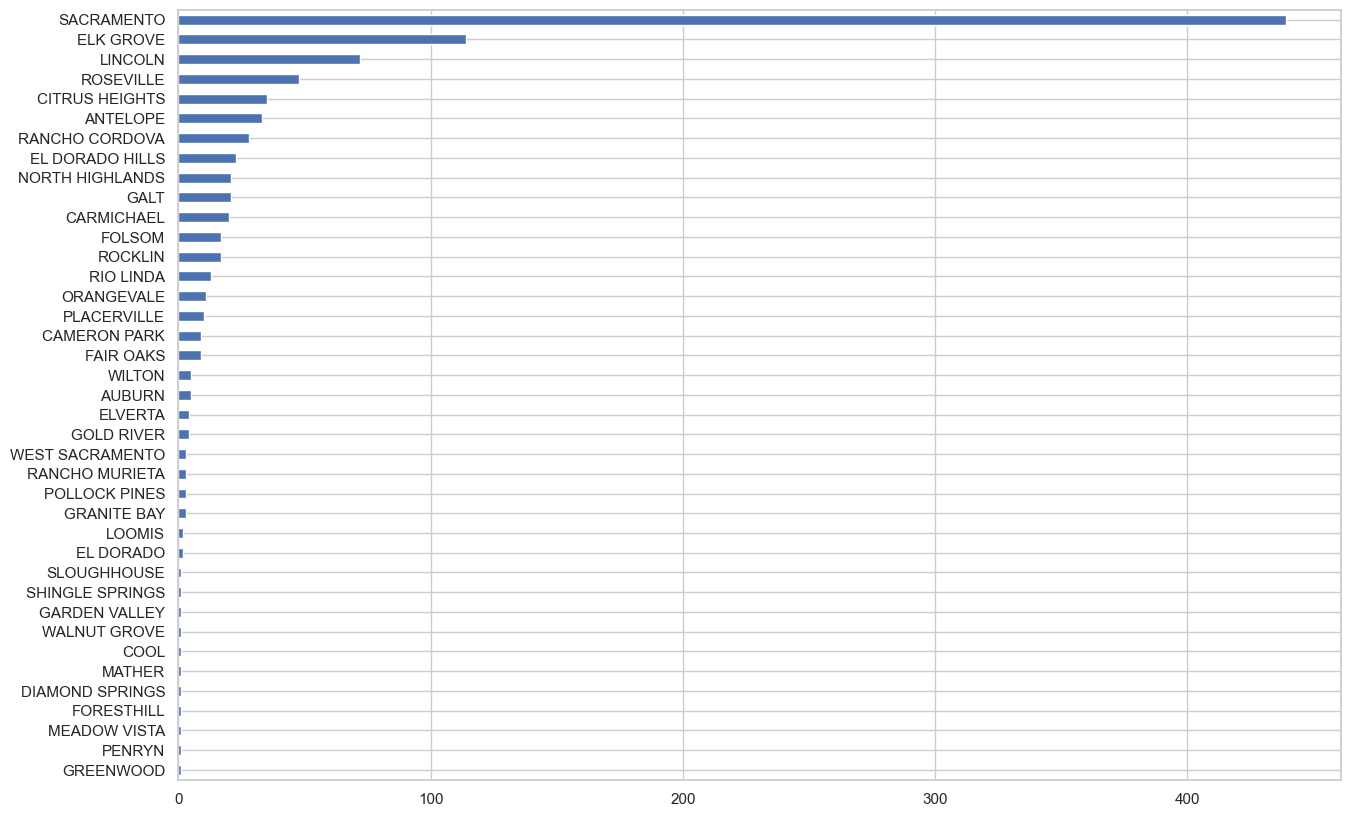

In [17]:
data['city'].value_counts().sort_values().plot(kind='barh', figsize=(15,10));

In [18]:
data.loc[data['beds'] == 0, 'type'] =  'Land'

<AxesSubplot: >

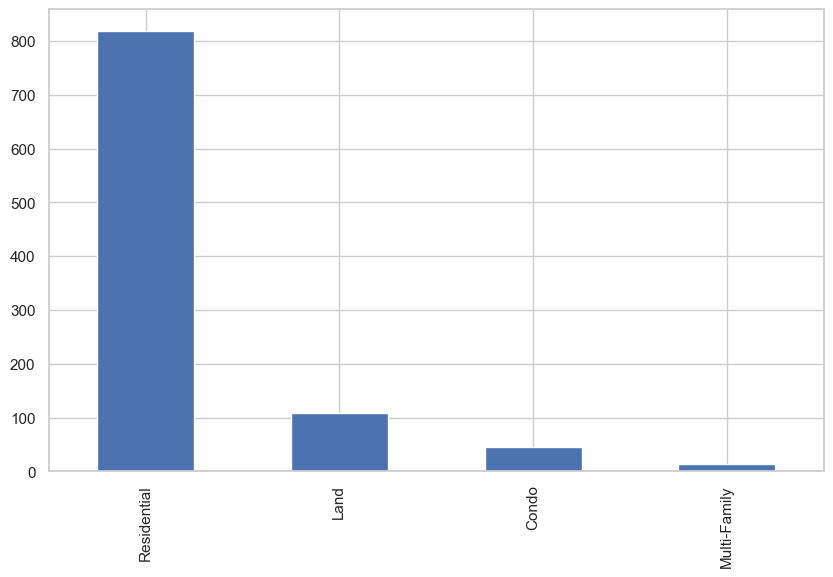

In [20]:
data['type'].value_counts().plot(kind='bar')

In [70]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_hat,predicted
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234144.263959,208206.784187
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234144.263959,226133.293924
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234144.263959,206040.438599
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234144.263959,209073.322422
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234144.263959,206094.597239


In [83]:
data.iloc[984]['latitude']

38.655245

In [78]:
data[data['latitude'] == 38.655245]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_hat,predicted
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915,234144.263959,236694.228663


In [88]:
len(data.head(1000))

985

In [66]:
import folium
import pandas as pd

m = folium.Map(location=[38.575764, -121.478851])

for i in range(0, len(data.head(1000))):
    folium.Marker(location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']]).add_to(m)
    
display(m)

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [ ]:
# ANSWER
#Price is target variable.

#### 2.2 List all possible variables which might be Predictor variable.

In [ ]:
# ANSWER
#number of beds, number os maths, type, st__ft

In [21]:
Y = data['price']

In [22]:
X = data['beds']

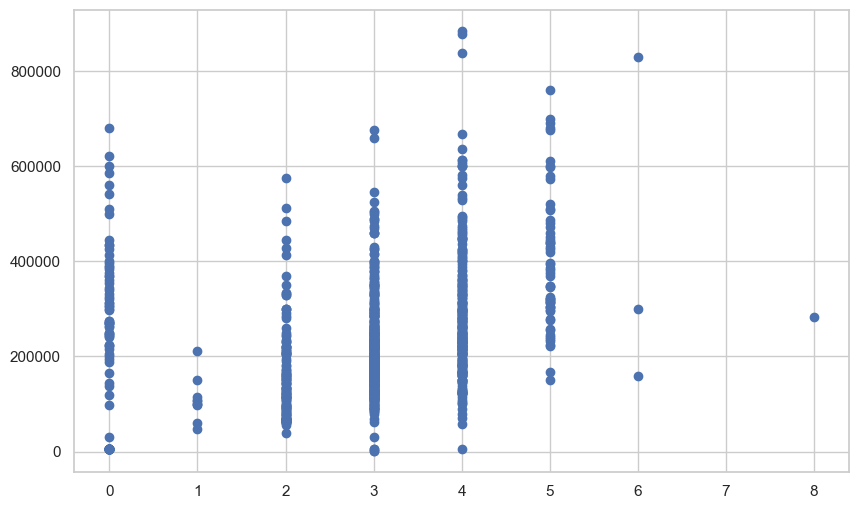

In [23]:
plt.scatter(X,Y)

In [24]:
def draw_scatter_plot(X,Y):
    #plot the data
    #create a figure
    fig = plt.figure(figsize=(15,7))
    #get the axis of that figure
    ax = plt.gca()
    ax.scatter(X, Y, c='b')
    
    plt.show()

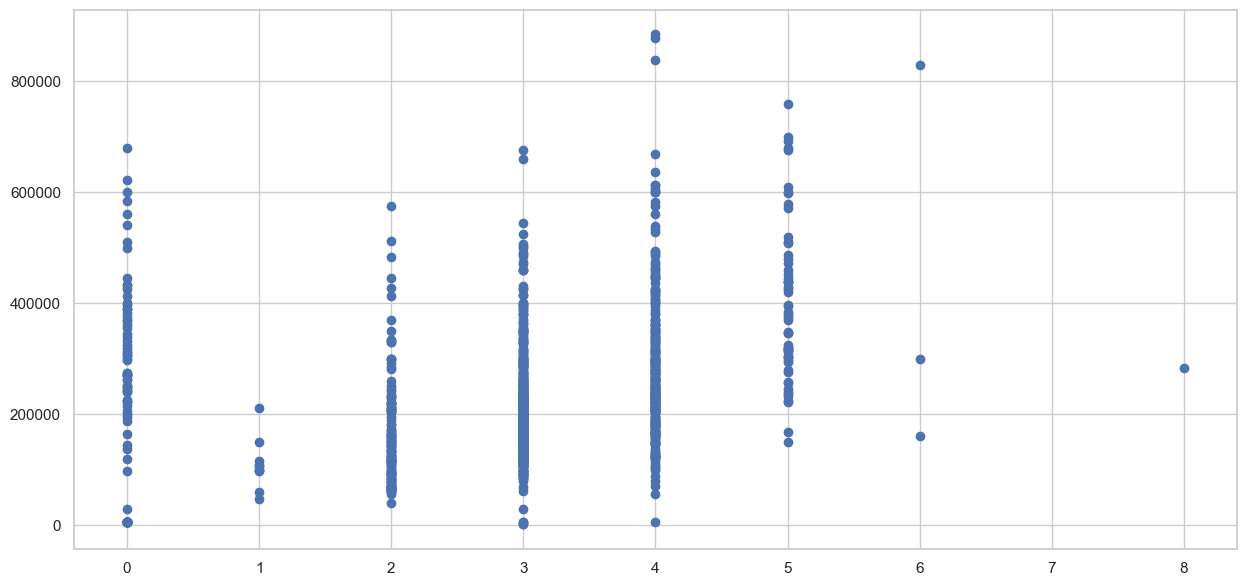

In [25]:
#beds
draw_scatter_plot(data['beds'], data['price'])

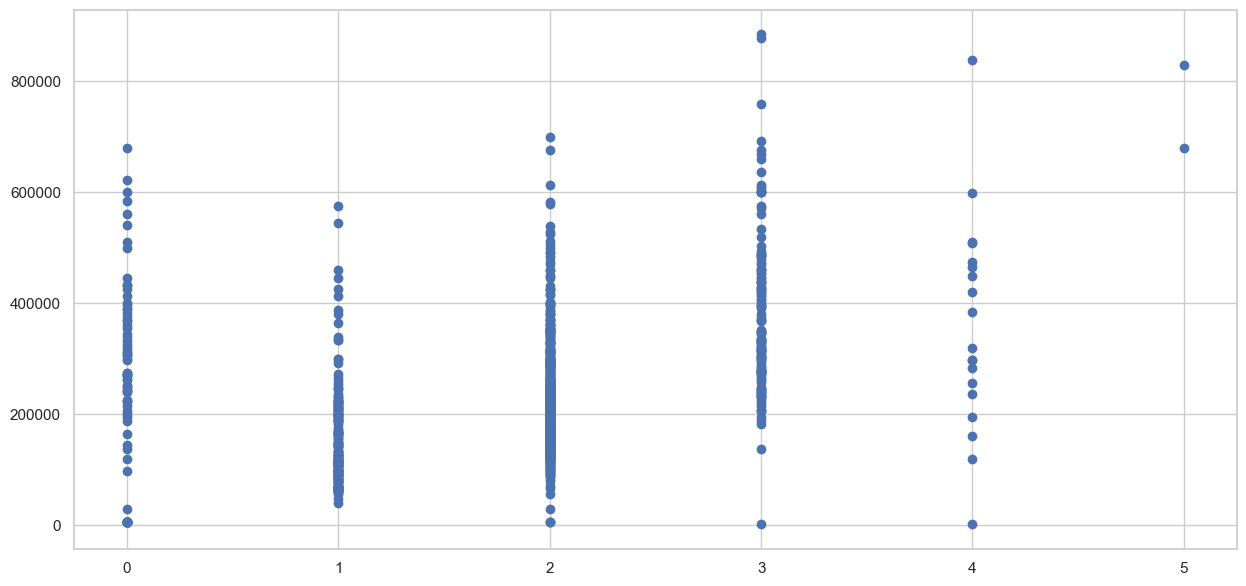

In [26]:
#baths
draw_scatter_plot(data['baths'], data['price'])

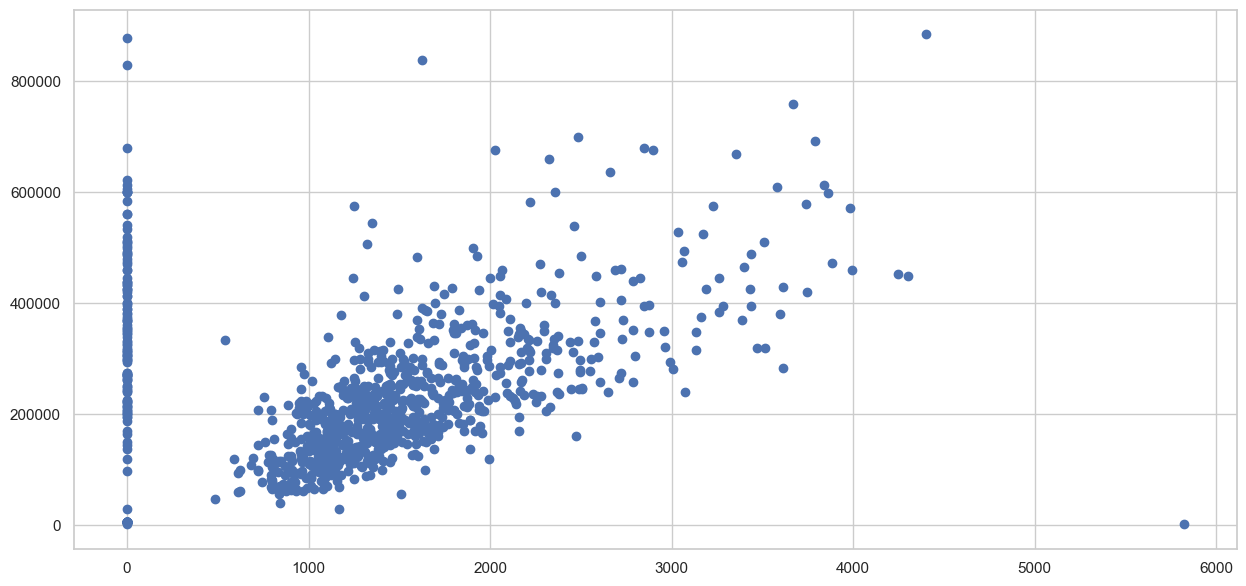

In [27]:
#sq__ft
draw_scatter_plot(data['sq__ft'], data['price'])

In [28]:
data[data['sq__ft'] > 5800]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
866,14151 INDIO DR,SLOUGHHOUSE,95683,CA,3,4,5822,Residential,Fri May 16 00:00:00 EDT 2008,2000,38.490447,-121.129337


In [29]:
df_test = data[data.type != 'Land']

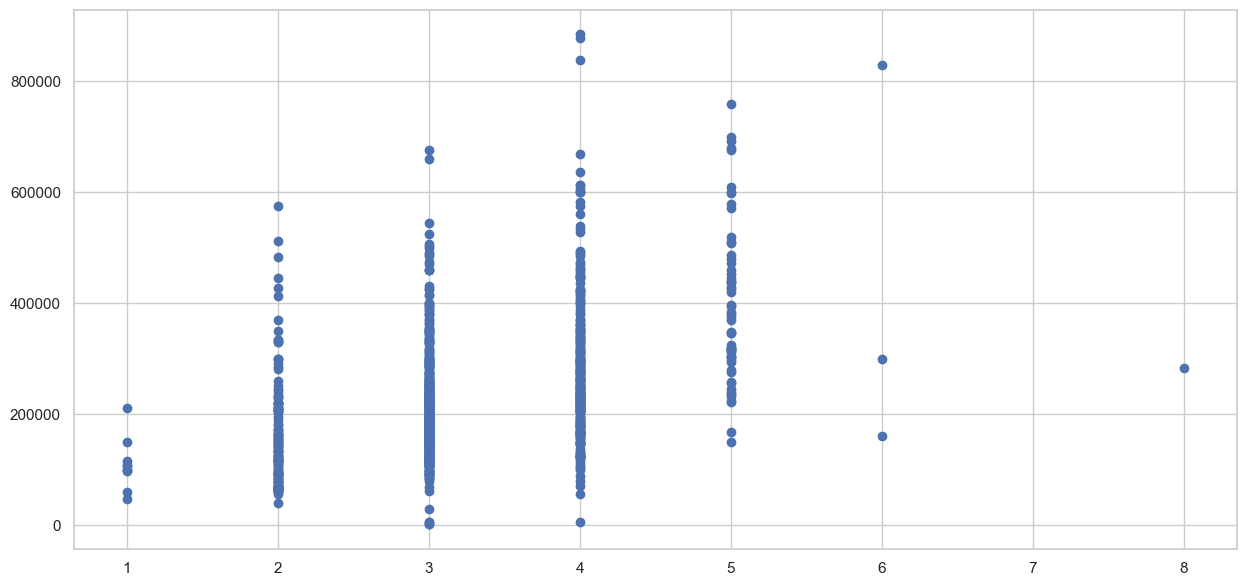

In [30]:
#beds
draw_scatter_plot(df_test['beds'], df_test['price'])

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [31]:
# ANSWER
data.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


In [ ]:
# sq__ft is the best predictor
# sq__ft got strong relationship with beds and baths

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [32]:
# ANSWER
#Mean of price
data['y_hat'] = data['price'].mean()

In [33]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_hat
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234144.263959
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234144.263959
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234144.263959
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234144.263959
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234144.263959


In [34]:
X = data['sq__ft']
Y = data['price']
Yhat = data['y_hat']

In [35]:
def draw_plot(X, Y, Yhat):
    #plot the data
    #create a figure
    fig = plt.figure(figsize=(15,7))
    #get the axis of that figure
    ax = plt.gca()
    
    #plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')
    ax.plot(X, Yhat, color='r');
    
    plt.show()

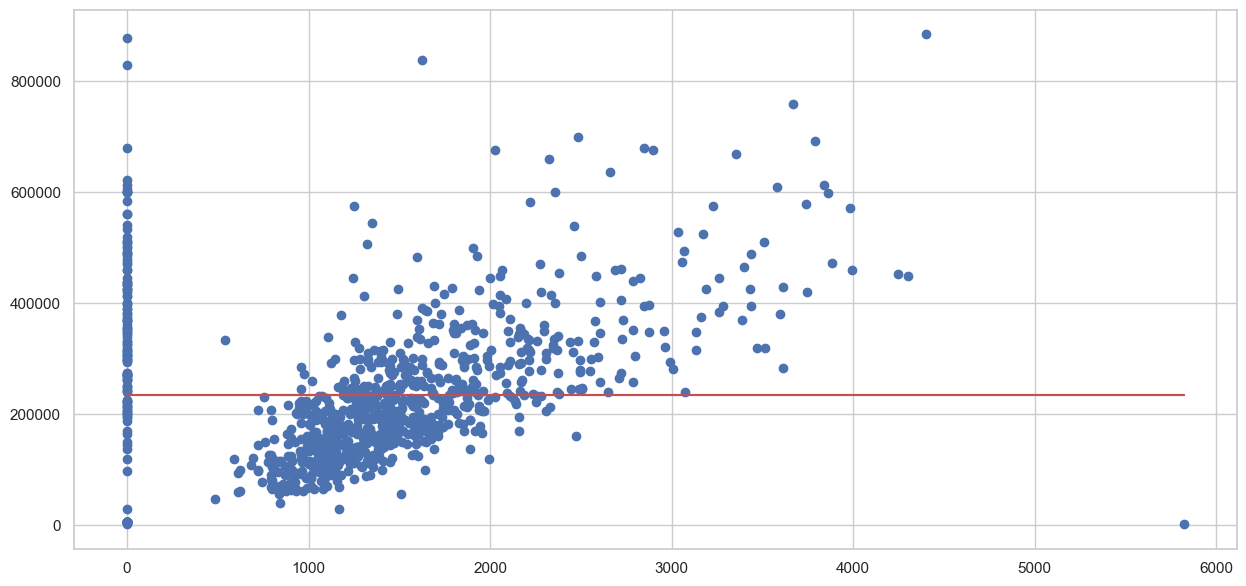

In [36]:
draw_plot(X, Y, Yhat)

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [37]:
# ANSWER
res = abs(data['price'] - data['y_hat']).mean()
res

103452.16956891476

In [ ]:
#on average, prediction is off by $103452

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [38]:
# ANSWER
X = data['sq__ft']
Y = data['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [39]:
# ANSWER
def calculate_beta_1(X,Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    n = np.sum((Y - Ybar) * (X- Xbar))
    d = np.sum(np.square(X - Xbar))
    
    beta_1 = n/d
    
    return beta_1

In [40]:
beta_1 = calculate_beta_1(X,Y)
beta_1

54.158639688530755

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [41]:
# ANSWER
def calculate_beta_0(X,Y):
    
    Xbar = X.mean()
    Ybar = Y.mean()
    
    beta_0 = Ybar - calculate_beta_1(X,Y) * Xbar
    
    return beta_0

In [42]:
beta_0 = calculate_beta_0(X,Y)
beta_0

162930.16140699777

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [43]:
# ANSWER
def calculate_yhat(x, b0, b1):
    return b0 + b1 * x

In [44]:
data['predicted'] = calculate_yhat(X, beta_0, beta_1)

In [45]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_hat,predicted
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234144.263959,208206.784187
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234144.263959,226133.293924
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234144.263959,206040.438599
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234144.263959,209073.322422
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234144.263959,206094.597239


In [46]:
abs(data.price - data.predicted).mean()

95860.14770214104

In [47]:
Yhat_predicted = calculate_yhat(X, beta_0, beta_1)
Yhat_predicted

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [48]:
# ANSWER
def calculate_residual(Y, Yhat_predicted):
    res = Y - Yhat_predicted
    return res

In [49]:
resi = calculate_residual(Y, Yhat_predicted)
abs(resi)

0      148984.784187
1      157921.293924
2      137160.438599
3      139766.322422
4      124194.597239
           ...      
980     53986.859897
981      8922.472227
982      6212.932732
983     18886.469282
984       956.228663
Length: 985, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [50]:
# ANSWER
def calculate_total_sum_of_square(Y):
    Ybar = np.mean(Y)
    SStot = np.square(Y - Ybar)
    SStot = np.sum(SStot)
    return SStot

In [51]:
def calculate_residual_sum_of_square(Y, Yhat_predicted):
    SSres = np.square(Y - Yhat_predicted)
    SSres = np.sum(SSres)
    return SSres

In [52]:
def calculate_r_square(Y, Yhat_predicted):
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residual_sum_of_square(Y, Yhat_predicted)
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

In [53]:
calculate_r_square(Y, np.mean(Y))

0.0

In [54]:
calculate_r_square(Y, calculate_yhat(X, beta_0, beta_1)).mean()

0.11148717682951459

##### 2.7.F [BONUS] Draw Plot of Predicted Line

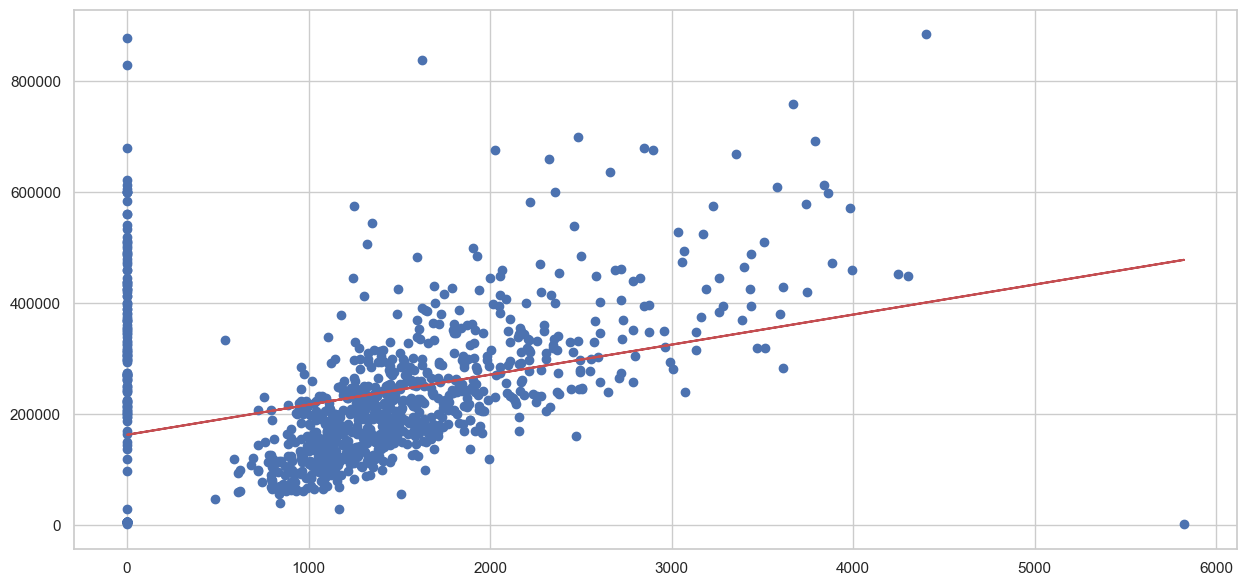

In [55]:
# ANSWER
draw_plot(X, Y, Yhat_predicted)

In [56]:
def draw_plot2(X, Y, Yhat, Yhat_predicted):
    #plot the data
    #create a figure
    fig = plt.figure(figsize=(15,7))
    #get the axis of that figure
    ax = plt.gca()
    
    #plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')
    ax.plot(X, Yhat, color='r')
    ax.plot(X, Yhat_predicted, color='g');
    
    plt.show()

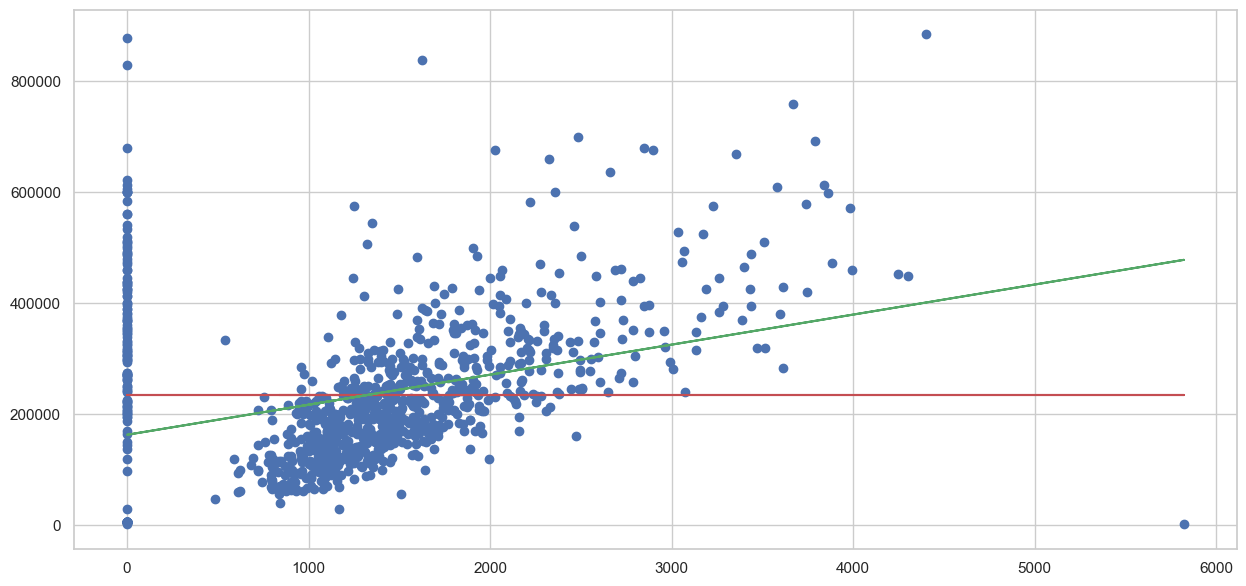

In [57]:
draw_plot2(X,Y,Yhat,Yhat_predicted)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

In [58]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_hat,predicted
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234144.263959,208206.784187
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234144.263959,226133.293924
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234144.263959,206040.438599
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234144.263959,209073.322422
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234144.263959,206094.597239


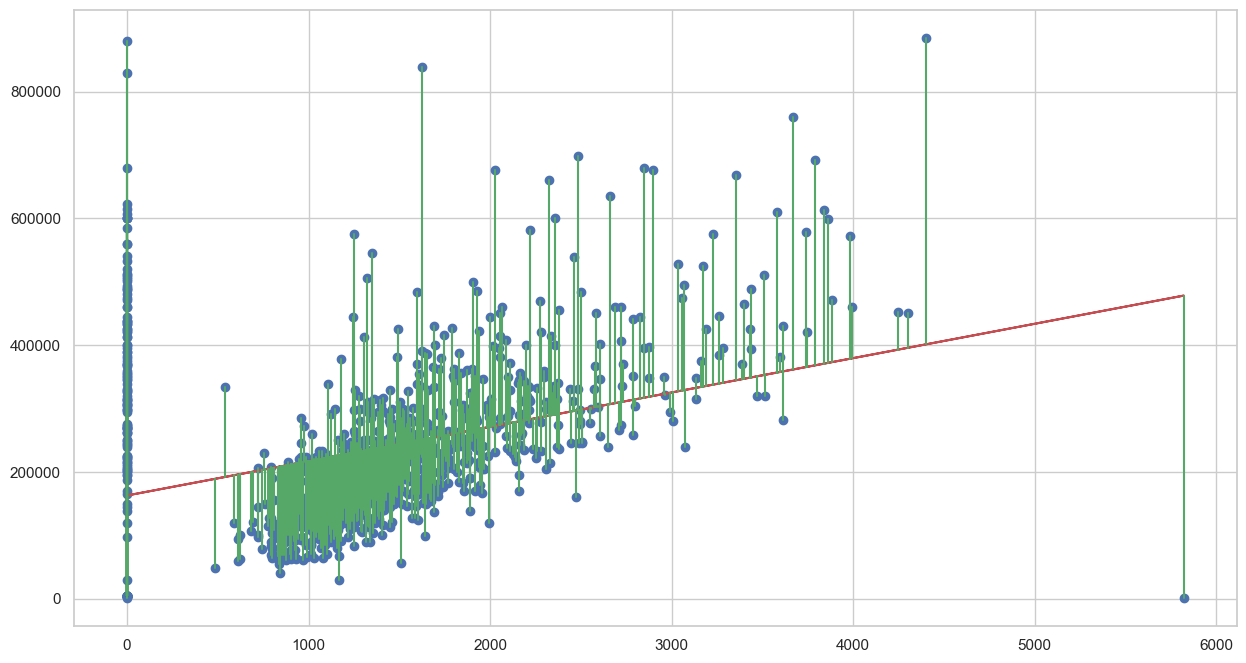

In [59]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=X, y=Y, c='b')
ax.plot(X, Yhat_predicted, color='r');

# iterate over predictions
for _, row in data.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['predicted']), 'g-')

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [60]:
# ANSWER
xpred = 1204
xpred

1204

In [61]:
beta_0

162930.16140699777

In [62]:
beta_1

54.158639688530755

In [63]:
Ypred = beta_1 * xpred + beta_0
Ypred

228137.1635919888



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



